In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [2]:
Weather_data = pd.read_csv("Weather_history.csv")

In [3]:
Weather_data.head(10)


,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
0,"Boise, ID",01/01/2020,46.1,37.1,40.9,29.7,NaN,0.20,NaN,13.9,31.1,9.8,64.9,78.89,"Rain, Partially cloudy"
1,"Boise, ID",01/02/2020,44.1,33.2,38.8,31.3,NaN,0.00,NaN,13.8,12.8,9.9,63.0,69.08,Partially cloudy
2,"Boise, ID",01/03/2020,48.8,34.0,40.8,29.0,NaN,0.00,NaN,19.5,16.1,9.9,3.7,63.65,Clear
3,"Boise, ID",01/04/2020,45.0,30.8,39.9,25.9,NaN,0.00,NaN,19.5,33.5,9.9,25.7,53.83,Partially cloudy
4,"Boise, ID",01/05/2020,38.0,29.9,33.8,24.9,NaN,0.05,NaN,11.3,NaN,8.8,63.2,76.31,"Rain, Partially cloudy"
5,"Boise, ID",01/06/2020,39.8,29.1,34.7,23.0,NaN,0.02,NaN,12.7,NaN,9.7,76.7,80.71,"Rain, Overcast"
6,"Boise, ID",01/07/2020,51.2,35.9,41.7,28.0,NaN,0.00,NaN,14.8,24.2,9.9,22.4,65.64,Clear
7,"Boise, ID",01/08/2020,45.0,32.0,38.5,30.2,NaN,0.08,NaN,17.2,28.9,9.3,75.7,71.22,"Rain, Overcast"
8,"Boise, ID",01/09/2020,37.2,29.1,32.9,22.4,NaN,0.11,NaN,20.6,31.3,8.9,71.7,77.84,"Rain, Partially cloudy"
9,"Boise, ID",01/10/2020,37.1,23.0,31.1,13.9,NaN,0.00,NaN,19.6,30.0,9.9,75.3,64.45,Overcast


In [4]:
for i in range(len(Weather_data)):
    if (Weather_data.loc[i,'Conditions'].find("Rain")):
        Weather_data.loc[i,'Conditions']=1
    else:
        Weather_data.loc[i,'Conditions']=0

In [5]:
Weather_data.head()

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
0,"Boise, ID",01/01/2020,46.1,37.1,40.9,29.7,NaN,0.20,NaN,13.9,31.1,9.8,64.9,78.89,0
1,"Boise, ID",01/02/2020,44.1,33.2,38.8,31.3,NaN,0.00,NaN,13.8,12.8,9.9,63.0,69.08,1
2,"Boise, ID",01/03/2020,48.8,34.0,40.8,29.0,NaN,0.00,NaN,19.5,16.1,9.9,3.7,63.65,1
3,"Boise, ID",01/04/2020,45.0,30.8,39.9,25.9,NaN,0.00,NaN,19.5,33.5,9.9,25.7,53.83,1
4,"Boise, ID",01/05/2020,38.0,29.9,33.8,24.9,NaN,0.05,NaN,11.3,NaN,8.8,63.2,76.31,0


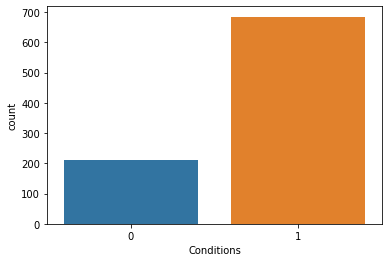

In [6]:
ax = sns.countplot(x="Conditions", data=Weather_data)

In [7]:
feature_cols = ['Maximum Temperature', 'Minimum Temperature', 'Temperature','Wind Speed','Visibility','Cloud Cover', 'Relative Humidity']
X = Weather_data[feature_cols] # Features
y = Weather_data.Conditions # Target variable

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.25, random_state=50)

In [17]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=1500, solver="lbfgs")

# fit the model with data
logreg.fit(X_train,y_train)


y_pred = logreg.predict(X_test)

In [18]:

X_test

,Maximum Temperature,Minimum Temperature,Temperature,Wind Speed,Visibility,Cloud Cover,Relative Humidity
830,70.0,50.8,58.7,10.0,9.8,50.5,55.15
762,36.0,28.2,31.9,10.2,9.3,52.2,82.69
144,100.1,65.1,82.5,11.4,9.9,0.0,32.57
390,77.0,57.9,67.8,13.8,9.9,19.4,48.85
7,45.0,32.0,38.5,17.2,9.3,75.7,71.22
...,...,...,...,...,...,...,...
628,60.2,48.1,53.9,7.6,9.7,97.3,58.00
248,74.9,59.0,66.5,15.0,9.9,13.5,51.14
851,52.1,28.9,40.3,12.7,9.7,21.0,57.91
213,69.2,51.2,59.2,14.9,9.9,36.8,47.77


In [19]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8844444444444445


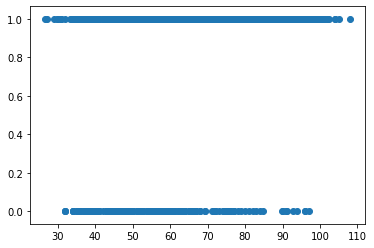

In [20]:
plt.scatter(X['Maximum Temperature'],y)
plt.show()

[]

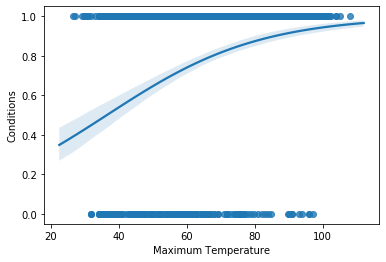

In [21]:
sns.regplot(x = "Maximum Temperature", y = "Conditions", data = Weather_data, logistic= True)
plt.plot()

Text(0.5, 0, 'Importance')

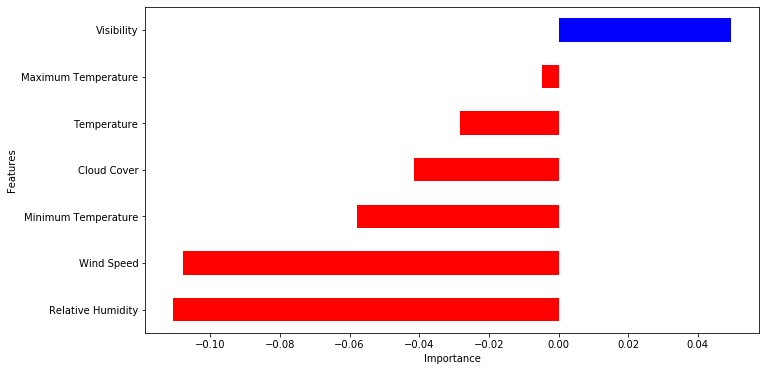

In [22]:
coeff = list(logreg.coef_[0])
labels = list(X_train.columns)
features = pd.DataFrame()
features["Features"] = labels
features["importance"] = coeff
features.sort_values(by = ['importance'], ascending = True, inplace = True)
features['positive'] = features['importance']> 0
features.set_index('Features', inplace = True)
features.importance.plot(kind="barh", figsize=(11,6), color= features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

In [15]:
coeff

[-0.03486190930405995,
 -0.07204801022839556,
 0.014126984739417616,
 -0.09819642776015625,
 0.1685225502469523,
 -0.05322998599039375,
 -0.10556404446048895]

The accuracy of my model was 88%, I guess my model is better at predicting than wild guess. This Weather data is collected from january 2018 to September 13, 2020. The ratio of raining to not raining in this data is approximately 1:3. Observing the Coefficient of my model for each features, Every feature except Visibility have more impact on predicting Not raining than raining. This much accuracy doesnot means that my model is better. 